In [1]:
# 🧭 Step 0: Setup
# Make sure to run this in the same folder as ios_imu_data.csv and images/
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
from PIL import Image
import matplotlib.pyplot as plt

# Optional: install exifread if PIL doesn’t extract timestamps correctly
# !pip install exifread


In [2]:
# 🕒 Step 1: Load IMU CSV
imu_path = "ios_imu_data.csv"

imu = pd.read_csv(imu_path)
#print("IMU Columns:", imu.columns.tolist())
#print("First few rows:")
display(imu.head())

# Detect timestamp column
timestamp_col = None
for c in imu.columns:
    if "time" in c.lower() or "timestamp" in c.lower():
        timestamp_col = c
        break

if timestamp_col is None:
    raise ValueError("Couldn't find a timestamp column in IMU CSV.")

# Parse timestamps
try:
    imu['timestamp'] = pd.to_datetime(imu[timestamp_col])
except:
    # maybe relative seconds
    imu['timestamp'] = pd.to_datetime(imu[timestamp_col], unit='s', origin='unix', errors='ignore')

imu = imu.sort_values('timestamp').reset_index(drop=True)
print("IMU time range:", imu['timestamp'].iloc[0], "→", imu['timestamp'].iloc[-1])
print("Duration (s):", (imu['timestamp'].iloc[-1] - imu['timestamp'].iloc[0]).total_seconds())


,seconds_elapsed,gyroscope_z,gyroscope_y,gyroscope_x,gyroscope_local_time,gravity_z,gravity_y,gravity_x,gravity_local_time,magnetometerUncalibrated_z,...,orientation_pitch,orientation_local_time,accelerometerUncalibrated_z,accelerometerUncalibrated_y,accelerometerUncalibrated_x,accelerometerUncalibrated_local_time,accelerometer_z,accelerometer_y,accelerometer_x,accelerometer_local_time
0,0.0,0.022835,-0.010623,0.009007,2025-10-15T16:36:45.203-07:00,-8.882070,-3.888641,1.461152,2025-10-15T16:36:45.203-07:00,-618.359883,...,0.407768,2025-10-15T16:36:45.203-07:00,-0.898404,-0.389062,0.146294,2025-10-15T16:36:45.194-07:00,0.064805,0.070292,-0.034881,2025-10-15T16:36:45.203-07:00
1,1.0,0.129613,0.013967,-0.002973,2025-10-15T16:36:46.127-07:00,-8.932343,-3.773773,1.456259,2025-10-15T16:36:46.127-07:00,-617.878179,...,0.395019,2025-10-15T16:36:46.127-07:00,-0.899348,-0.392066,0.149374,2025-10-15T16:36:46.128-07:00,0.104304,-0.063396,0.008804,2025-10-15T16:36:46.127-07:00
2,2.0,0.676961,-0.075345,-0.153531,2025-10-15T16:36:47.131-07:00,-9.107788,-3.434497,-0.738633,2025-10-15T16:36:47.131-07:00,-616.385504,...,0.358538,2025-10-15T16:36:47.131-07:00,-0.892794,-0.313339,-0.060555,2025-10-15T16:36:47.135-07:00,0.353437,0.350939,0.166757,2025-10-15T16:36:47.131-07:00
3,3.0,-0.070950,0.069375,0.126144,2025-10-15T16:36:48.135-07:00,-9.325626,-2.508462,-1.526939,2025-10-15T16:36:48.135-07:00,-617.430895,...,0.259361,2025-10-15T16:36:48.135-07:00,-0.979712,-0.254962,-0.165996,2025-10-15T16:36:48.129-07:00,-0.285958,0.016337,-0.107421,2025-10-15T16:36:48.135-07:00
4,4.0,-0.024046,0.023270,-0.005619,2025-10-15T16:36:49.130-07:00,-9.215886,-3.210657,-0.955711,2025-10-15T16:36:49.130-07:00,-617.353083,...,0.333550,2025-10-15T16:36:49.130-07:00,-0.931380,-0.322704,-0.097836,2025-10-15T16:36:49.133-07:00,0.081281,0.044543,-0.003981,2025-10-15T16:36:49.130-07:00


IMU time range: 2025-10-15 16:36:45.203000-07:00 → 2025-10-15 16:40:02.136000-07:00
Duration (s): 196.933


In [4]:
from PIL.ExifTags import TAGS
import os
from datetime import datetime

img_dir = "images"
photo_times = []

for fname in sorted(os.listdir(img_dir)):
    if fname.lower().endswith(('.jpg', '.jpeg', '.png', '.heic')):
        fpath = os.path.join(img_dir, fname)
        img = Image.open(fpath)
        exif = img.getexif()
        dt = None
        for tag, value in exif.items():
            if TAGS.get(tag) == "DateTimeOriginal":
                dt = datetime.strptime(value, "%Y:%m:%d %H:%M:%S")
                break
        if not dt:
            # fallback: file modified time
            ts = os.path.getmtime(fpath)
            dt = datetime.fromtimestamp(ts)
            print(f"📁 Using file modified time for {fname} → {dt}")
        photo_times.append({"filename": fname, "datetime": dt})

photo_df = pd.DataFrame(photo_times).sort_values("datetime").reset_index(drop=True)
display(photo_df.head())


📁 Using file modified time for IMG_2837.JPG → 2025-10-15 16:37:00
📁 Using file modified time for IMG_2838.JPG → 2025-10-15 16:37:06
📁 Using file modified time for IMG_2839.JPG → 2025-10-15 16:37:10
📁 Using file modified time for IMG_2840.JPG → 2025-10-15 16:37:14
📁 Using file modified time for IMG_2841.JPG → 2025-10-15 16:37:19
📁 Using file modified time for IMG_2842.JPG → 2025-10-15 16:37:23
📁 Using file modified time for IMG_2843.JPG → 2025-10-15 16:37:28
📁 Using file modified time for IMG_2844.JPG → 2025-10-15 16:37:32
📁 Using file modified time for IMG_2845.JPG → 2025-10-15 16:37:38
📁 Using file modified time for IMG_2846.JPG → 2025-10-15 16:37:44
📁 Using file modified time for IMG_2847.JPG → 2025-10-15 16:37:49
📁 Using file modified time for IMG_2848.JPG → 2025-10-15 16:37:53
📁 Using file modified time for IMG_2849.JPG → 2025-10-15 16:37:57
📁 Using file modified time for IMG_2850.JPG → 2025-10-15 16:38:06
📁 Using file modified time for IMG_2851.JPG → 2025-10-15 16:38:11
📁 Using fi

,filename,datetime
0,IMG_2837.JPG,2025-10-15 16:37:00
1,IMG_2838.JPG,2025-10-15 16:37:06
2,IMG_2839.JPG,2025-10-15 16:37:10
3,IMG_2840.JPG,2025-10-15 16:37:14
4,IMG_2841.JPG,2025-10-15 16:37:19


In [15]:
# check what pandas thinks your photo times are right now
photo_df['datetime'] = pd.to_datetime(photo_df['datetime'], errors='coerce')
print(photo_df['datetime'].head())


0   2025-10-15 23:37:00
1   2025-10-15 23:37:06
2   2025-10-15 23:37:10
3   2025-10-15 23:37:14
4   2025-10-15 23:37:19
Name: datetime, dtype: datetime64[ns]


Using IMU column 'accelerometerUncalibrated_z' for visualization


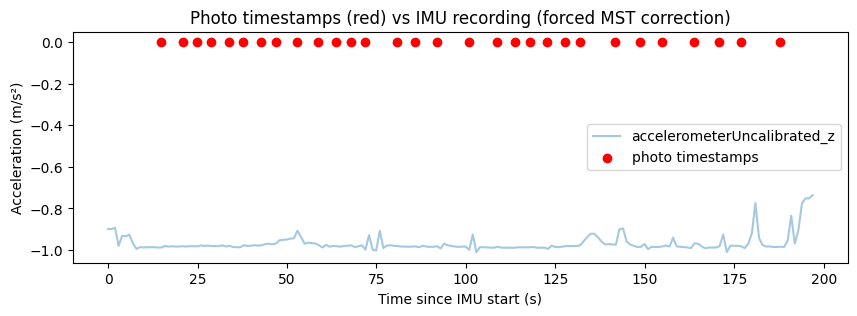

📊 Time Ranges (after −7 h correction):
IMU recording: 2025-10-15 16:36:45.203000 → 2025-10-15 16:40:02.136000
Duration: 196.93 s
First photo:   2025-10-15 16:37:00
Last photo:    2025-10-15 16:39:53
✅ Photo capture times overlap with IMU recording — alignment confirmed (MST).


In [16]:
# 🧭 Step: Force photo times back to local MST and verify alignment
import matplotlib.pyplot as plt
from datetime import timedelta

# 1️⃣ IMU timestamps already correct (MST local wall time)
imu['timestamp'] = pd.to_datetime(imu['timestamp'], errors='coerce')
imu = imu.sort_values('timestamp').reset_index(drop=True)

# 2️⃣ Photo timestamps: subtract 7 hours to undo UTC→MST shift
photo_df['datetime'] = pd.to_datetime(photo_df['datetime'], errors='coerce')
photo_df['datetime'] = photo_df['datetime'] - timedelta(hours=7)
photo_df = photo_df.sort_values('datetime').reset_index(drop=True)

# 3️⃣ Compare ranges
imu_time_start = imu['timestamp'].iloc[0]
imu_time_end   = imu['timestamp'].iloc[-1]
photo_start    = photo_df['datetime'].iloc[0]
photo_end      = photo_df['datetime'].iloc[-1]

# 4️⃣ Compute relative seconds
photo_times_seconds = [(t - imu_time_start).total_seconds() for t in photo_df['datetime']]
imu_time_seconds    = (imu['timestamp'] - imu_time_start).dt.total_seconds()

# 5️⃣ Auto-detect acceleration column
accel_cols = [c for c in imu.columns if 'accel' in c.lower()]
if not accel_cols:
    raise ValueError(f"No acceleration column found; got {imu.columns.tolist()}")
accel_col = accel_cols[0]
print(f"Using IMU column '{accel_col}' for visualization")

# 6️⃣ Plot
plt.figure(figsize=(10,3))
plt.plot(imu_time_seconds, imu[accel_col], label=accel_col, alpha=0.4)
plt.scatter(photo_times_seconds, [0]*len(photo_times_seconds),
            color='red', label='photo timestamps', zorder=5)
plt.legend()
plt.xlabel("Time since IMU start (s)")
plt.ylabel("Acceleration (m/s²)")
plt.title("Photo timestamps (red) vs IMU recording (forced MST correction)")
plt.show()

# 7️⃣ Diagnostics
print("📊 Time Ranges (after −7 h correction):")
print(f"IMU recording: {imu_time_start} → {imu_time_end}")
print(f"Duration: {(imu_time_end - imu_time_start).total_seconds():.2f} s")
print(f"First photo:   {photo_start}")
print(f"Last photo:    {photo_end}")

if photo_end < imu_time_start:
    print("⚠️ Photos captured before IMU recording started.")
elif photo_start > imu_time_end:
    print("⚠️ IMU recording ended before photos started.")
else:
    print("✅ Photo capture times overlap with IMU recording — alignment confirmed (MST).")


In [22]:
# 🧩 Step: Match each photo to nearest IMU sample and export alignment
import numpy as np
import pandas as pd

# Ensure both are sorted by time
imu = imu.sort_values('timestamp').reset_index(drop=True)
photo_df = photo_df.sort_values('datetime').reset_index(drop=True)

imu_times = imu['timestamp'].values.astype('datetime64[ns]')
photo_times = photo_df['datetime'].values.astype('datetime64[ns]')

matches = []
for fname, t_photo in zip(photo_df['filename'], photo_times):
    # compute absolute time difference in seconds
    diffs = np.abs((imu_times - t_photo).astype('timedelta64[ms]').astype(float)) / 1000.0
    nearest_idx = np.argmin(diffs)
    nearest_row = imu.iloc[nearest_idx].to_dict()
    nearest_row['photo'] = fname
    nearest_row['photo_time'] = pd.to_datetime(t_photo)
    nearest_row['imu_time'] = imu.iloc[nearest_idx]['timestamp']
    nearest_row['imu_time_diff_s'] = diffs[nearest_idx]
    matches.append(nearest_row)

aligned = pd.DataFrame(matches)

# Reorder useful columns for clarity
col_order = (
    ['photo', 'photo_time', 'imu_time', 'imu_time_diff_s'] +
    [c for c in imu.columns if c not in ['timestamp']]
)
aligned = aligned[col_order]

# Save result
aligned.to_csv("aligned_photo_imu.csv", index=False)
print("✅ Exported aligned data → aligned_photo_imu.csv")
print(f"Average time difference: {aligned['imu_time_diff_s'].mean():.3f} s")

# Preview first few rows
display(aligned.head())


✅ Exported aligned data → aligned_photo_imu.csv
Average time difference: 0.132 s


,photo,photo_time,imu_time,imu_time_diff_s,seconds_elapsed,gyroscope_z,gyroscope_y,gyroscope_x,gyroscope_local_time,gravity_z,...,orientation_pitch,orientation_local_time,accelerometerUncalibrated_z,accelerometerUncalibrated_y,accelerometerUncalibrated_x,accelerometerUncalibrated_local_time,accelerometer_z,accelerometer_y,accelerometer_x,accelerometer_local_time
0,IMG_2837.JPG,2025-10-15 16:37:00,2025-10-15 16:37:00.135,0.135,15.0,0.053253,-0.019258,-0.004439,2025-10-15T16:37:00.135-07:00,-9.762937,...,-0.066032,2025-10-15T16:37:00.135-07:00,-0.987431,0.066210,-0.063365,2025-10-15T16:37:00.129-07:00,0.081532,0.001777,0.040302,2025-10-15T16:37:00.135-07:00
1,IMG_2838.JPG,2025-10-15 16:37:06,2025-10-15 16:37:06.133,0.133,21.0,-0.000501,-0.004474,-0.000432,2025-10-15T16:37:06.133-07:00,-9.712264,...,-0.052304,2025-10-15T16:37:06.133-07:00,-0.981831,0.048635,-0.123387,2025-10-15T16:37:06.134-07:00,0.085508,-0.035216,0.046977,2025-10-15T16:37:06.133-07:00
2,IMG_2839.JPG,2025-10-15 16:37:10,2025-10-15 16:37:10.130,0.130,25.0,0.054564,-0.014750,-0.010651,2025-10-15T16:37:10.130-07:00,-9.711562,...,-0.061169,2025-10-15T16:37:10.130-07:00,-0.982128,0.059247,-0.118700,2025-10-15T16:37:10.131-07:00,0.074637,-0.013179,0.057894,2025-10-15T16:37:10.130-07:00
3,IMG_2840.JPG,2025-10-15 16:37:14,2025-10-15 16:37:14.136,0.136,29.0,0.002471,0.011096,0.015074,2025-10-15T16:37:14.136-07:00,-9.680090,...,-0.051588,2025-10-15T16:37:14.136-07:00,-0.981021,0.049852,-0.145714,2025-10-15T16:37:14.128-07:00,0.064177,-0.017768,0.057161,2025-10-15T16:37:14.136-07:00
4,IMG_2841.JPG,2025-10-15 16:37:19,2025-10-15 16:37:19.127,0.127,34.0,-0.021598,0.029419,-0.003451,2025-10-15T16:37:19.127-07:00,-9.713937,...,0.004962,2025-10-15T16:37:19.127-07:00,-0.979706,-0.008347,-0.131745,2025-10-15T16:37:19.129-07:00,0.113808,-0.035915,0.052667,2025-10-15T16:37:19.127-07:00


In [ ]:
len(aligned)